<a href="https://colab.research.google.com/github/abidshafee/predictionModel/blob/master/diabetes_prediction_tf_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
csv_data = 'https://raw.githubusercontent.com/abidshafee/predictionModel/master/diabetes.csv'

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(csv_data)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.columns[:-1] #all columns excluding the Outcome

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
len(df.columns[:-1])

8

In [8]:
df[df['Outcome']==1] # return a dataframe where Outcome is 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [49]:
df.shape

(768, 9)

### Detecting Univariate Outliar

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

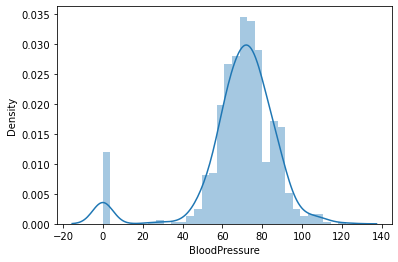

In [42]:
#distribution plot
sns.distplot(df[df.columns[2]])

c:\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SkinThickness'>

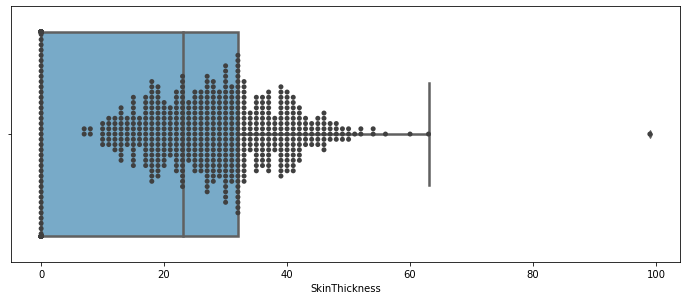

In [48]:
#Univariate outliers boxplot
ax = plt.subplots(figsize=(12, 4.7))
sns.boxplot(x=df[df.columns[3]], data=df, hue='Outcome', linewidth=2.5, orient="h", palette="Blues")
sns.swarmplot(x=df[df.columns[3]], color=".25")

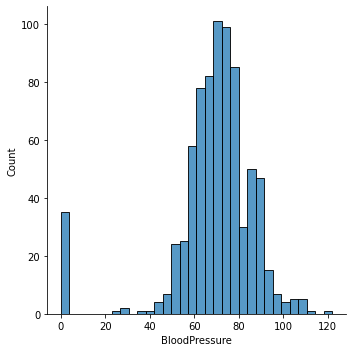

In [43]:
sns.displot(df[df.columns[2]], legend=True)

### Class-wise Data Distribution

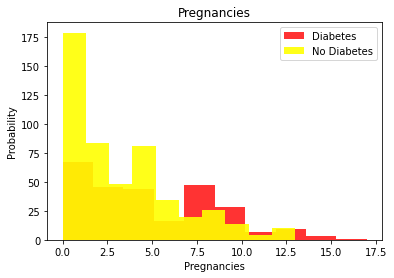

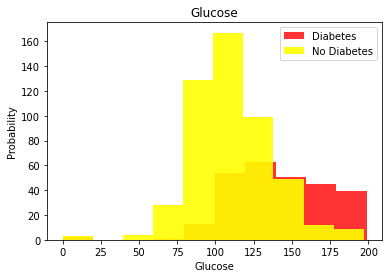

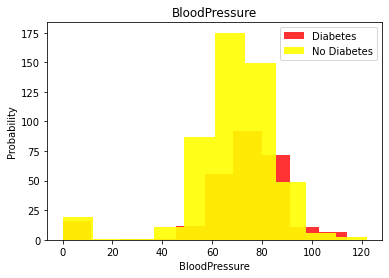

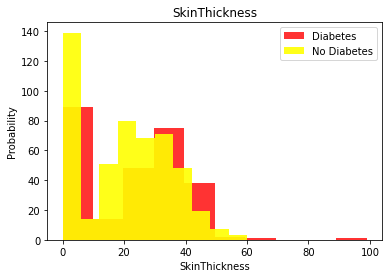

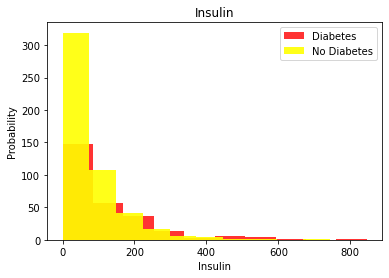

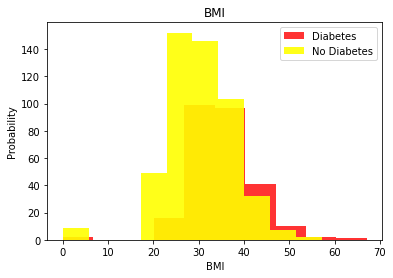

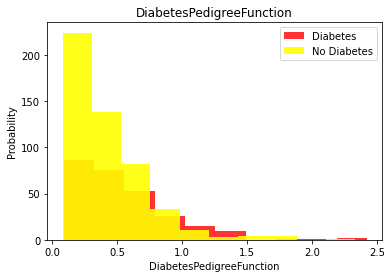

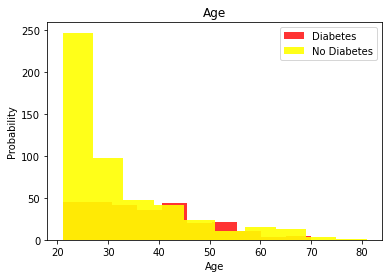

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='red', label='Diabetes', alpha=0.8)
  plt.hist(df[df['Outcome']==0][label], color='yellow', label='No Diabetes', alpha = 0.9)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [10]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [11]:
X = df.iloc[:, 0:-1].values

In [12]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
y = df.iloc[:,-1].values

In [14]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [15]:
# Scaling X into Standard deviation range
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [16]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Creating Scalled DataFrame

In [17]:
X.shape, y.shape

((768, 8), (768,))

In [18]:
data = np.hstack((X, np.reshape(y, (-1, 1))))

In [19]:
scaled_df = pd.DataFrame(data, columns=df.columns)

In [20]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


### ploting Scalled data distribution in standard deviation range

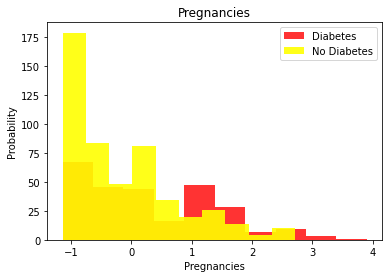

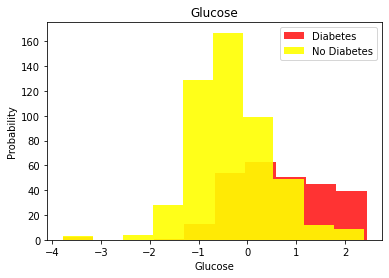

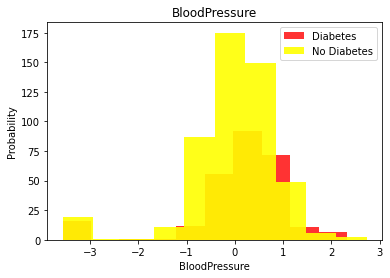

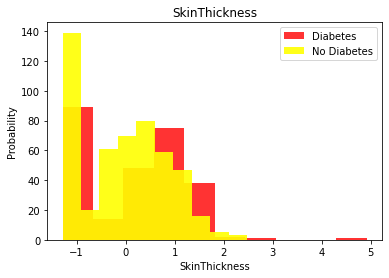

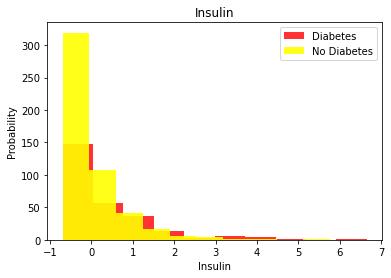

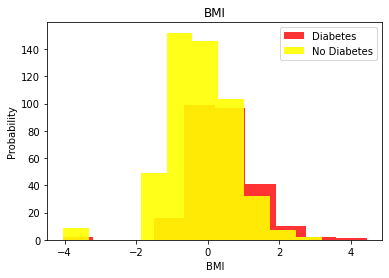

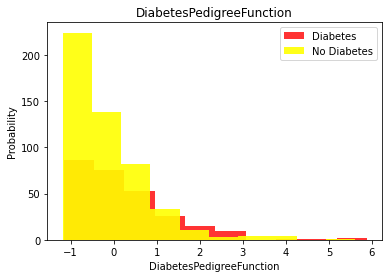

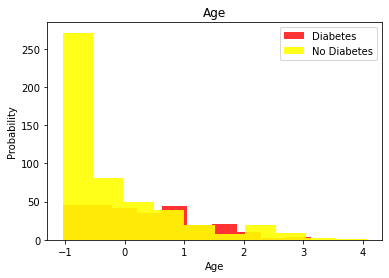

In [21]:
for i in range(len(df.columns[:-1])):
  label = scaled_df.columns[i]
  plt.hist(scaled_df[scaled_df['Outcome']==1][label], color='red', label='Diabetes', alpha=0.8)
  plt.hist(scaled_df[scaled_df['Outcome']==0][label], color='yellow', label='No Diabetes', alpha = 0.9)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

### tf neural net

In [22]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=11)

In [23]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation= 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [26]:
model.evaluate(x_train, y_train)
# model.fit(x_train, y_train)

20/20 [==============================] - 2s 4ms/step - loss: 0.6637 - accuracy: 0.6645


[0.663699209690094, 0.6644951105117798]

In [27]:
model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
77/77 [==============================] - 2s 2ms/step - loss: 0.6247 - accuracy: 0.6954 - val_loss: 0.6126 - val_accuracy: 0.5974
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7166 - val_loss: 0.5839 - val_accuracy: 0.6494
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7378 - val_loss: 0.5628 - val_accuracy: 0.6883
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7541 - val_loss: 0.5530 - val_accuracy: 0.6883
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7541 - val_loss: 0.5471 - val_accuracy: 0.6623
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7704 - val_loss: 0.5471 - val_accuracy: 0.6753
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7752 - val_loss: 0.5462 - val_accuracy: 0.7013
Epoch 8/100
7

In [28]:
pred =model.predict(x_test)

In [29]:
print(pred.shape, y_test.shape)

(77, 1) (77,)


In [30]:
y_test = np.expand_dims(y_test, axis=0)

In [31]:
pred = np.expand_dims(pred, axis=0)

### Converting NNumpy two dimentional array to one dimetional

In [32]:
pred = np.squeeze(pred)

In [33]:
print(pred.shape, y_test.shape)

(77,) (1, 77)


In [34]:
# pred
y_test

array([[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]], dtype=int64)

In [35]:
y_test = y_test.astype(int)

In [36]:
y_test

array([[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

In [37]:
pred

array([0.00828803, 0.82313263, 0.36038506, 0.26705748, 0.26960394,
       0.08020091, 0.093072  , 0.297287  , 0.01453862, 0.11739472,
       0.78442764, 0.00805056, 0.0466381 , 0.0163182 , 0.01097336,
       0.10438982, 0.01745623, 0.4857557 , 0.87243986, 0.00771552,
       0.81023693, 0.3045416 , 0.47129935, 0.46859646, 0.22393733,
       0.74476135, 0.14459923, 0.10184723, 0.15377551, 0.13866267,
       0.15350911, 0.9633641 , 0.5278729 , 0.581449  , 0.29691723,
       0.00267291, 0.0038802 , 0.34070322, 0.07422635, 0.00467771,
       0.84195614, 0.16069984, 0.56309235, 0.90508294, 0.00557625,
       0.94086254, 0.01152146, 0.01975226, 0.01452091, 0.00986221,
       0.00666645, 0.20363522, 0.7196103 , 0.00574642, 0.07472414,
       0.13648114, 0.7514651 , 0.32119194, 0.00428528, 0.02037677,
       0.5229499 , 0.81896216, 0.02484858, 0.03388467, 0.98818064,
       0.617926  , 0.08585066, 0.33858007, 0.81909263, 0.08915073,
       0.08963898, 0.04904881, 0.24954683, 0.9443144 , 0.08761

In [38]:
pred = pred.astype(int)

In [39]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
model.evaluate(pred, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 77
  y sizes: 1
Make sure all arrays contain the same number of samples.

In [ ]:
#model.predict(x_test[5])
# x_test[1]
x_test.shape

(116, 8)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


### Save the trained model

In [ ]:
model.save("diabetes_dnnmodel2.h5")

### Load the trained Model

In [ ]:
new_model = tf.keras.models.load_model("diabetes_dnnmodel2.h5")

In [ ]:
evlr = new_model.evaluate(x_test, y_test, verbose=2)

4/4 - 0s - loss: 0.4851 - accuracy: 0.7931


In [ ]:
evlr[1]

0.7931034564971924

In [ ]:
pred = new_model.predict(x_test[5:29])
# new_model = new_model.astype(int)
pred.dtype
pred = pred.astype(int)
pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])